In [1]:
import textdistance as td
from ipywidgets import interact

In [2]:
ALGORITHMS = [
    "Levenshtein",
    "Hamming",
]

CALCULATIONS = ["Distance", "Similarity"]


algorithm_to_apply = {
        ("Levenshtein", "Distance", True): td.levenshtein.normalized_distance,
        ("Levenshtein", "Similarity", True): td.levenshtein.normalized_similarity,
        ("Levenshtein", "Distance", False): td.levenshtein.distance,
        ("Levenshtein", "Similarity", False): td.levenshtein.similarity,
        
        ("Hamming", "Distance", True): td.hamming.normalized_distance,
        ("Hamming", "Similarity", True): td.hamming.normalized_similarity,
        ("Hamming", "Distance", False): td.hamming.distance,
        ("Hamming", "Similarity", False): td.hamming.similarity,
        
    }

# Distance metrics

[**Levenshtein distance**: ](https://en.wikipedia.org/wiki/Levenshtein_distance) *'The Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other.'*

For Levenshtein distance, the following *edits* are available. This example is drawn from [here](https://github.com/life4/textdistance/blob/master/textdistance/algorithms/edit_based.py):

        * deletion:     ABC -> BC, AC, AB
        * insertion:    ABC -> ABCD, EABC, AEBC..
        * substitution: ABC -> ABE, ADC, FBC..

[**Hamming distance**](https://en.wikipedia.org/wiki/Hamming_distance) '*The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.*'

**Normalised distance:** *Many distance metrics, like Levenshtein and Hamming distance, represent a count of some kind. While these values are easy to interpret, they are less easy to compare across metrics. Checking the "normalised" box below will normalise the metrics to a value between zero and one, for easier comparison.*

## Exercise

Try entering different pairs of words below to see how their similarity could be calculated ("pesto" and "pasta", for instance). See what happens to the Hamming distance if you add a single letter to the start of otherwise similar words:

In [3]:
@interact
def test_metric(string1="", 
                string2="",
                algorithm=ALGORITHMS,
                calculation=CALCULATIONS,
                normalised=False
               ):

    print(algorithm_to_apply[(algorithm, calculation, normalised)](string1, string2))

interactive(children=(Text(value='', description='string1'), Text(value='', description='string2'), Dropdown(d…

There are *many* different text distance metrics that could be applied to music. For a more complete guide see [here](https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227)

# Musical example of distance metrics

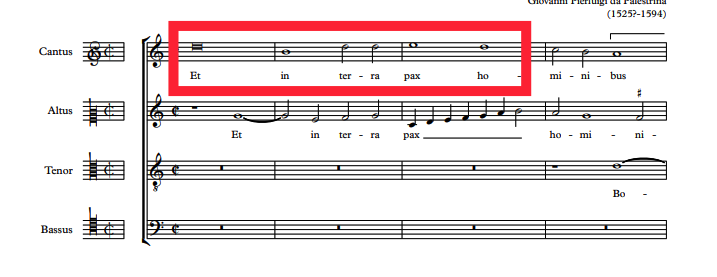

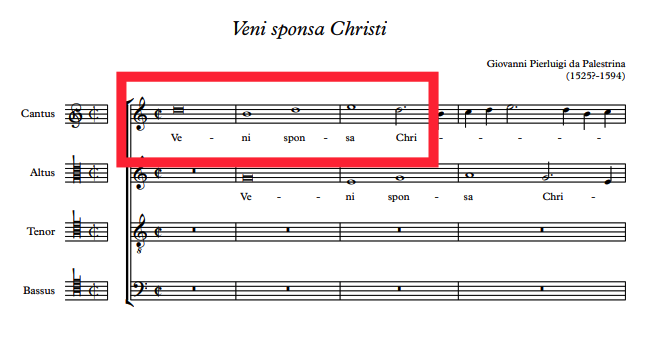

Let's have a look at calculating the Levenshtein distance between these two melodies. First we might try encoding the melodies as strings of letters to represent the notes. This are analogous to the words we tried above:

In [4]:
melody_1 = "dbdded"
melody_2 = "dbded"

In [5]:
td.levenshtein.distance(melody_1, melody_2)

1

As expected, this gives us a Levenshtein distance of 1 because we can move from the first string of text to the second with a single deletion. Encoding melodies as letters, however, is somewhat inflexible, and won't recognise the same intervallic pattern with different starting pitches. Instead, we might encode the melodies as a series of chromatic intervals:

In [6]:
melody_intervals_1 = [-3, 3, 0, 2, -2]
melody_intervals_2 = [-3, 3, 2, -2]

In [7]:
td.levenshtein.distance(melody_intervals_1, melody_intervals_2)

1

As expected, this gives us the same result as above.